In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import folium
import h3
import geopandas as gpd
import geojson

In [29]:
df = pd.read_csv(
    "../data/analytics_trip_data.csv",
    index_col=None,
    dtype={
        'payment_type': 'category',
        'company': 'category'
    },     
    parse_dates=['trip_start_timestamp','trip_middle_timestamp','trip_end_timestamp'])

In [30]:
pd.set_option('display.max_columns', None)
df.describe()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,trip_middle_timestamp,price_per_mile,miles_per_hour,temperature,precipitation
count,14562028,14562028,1.456203e+07,1.456203e+07,1.137150e+07,1.137150e+07,1.456157e+07,1.450446e+07,1.456203e+07,1.456203e+07,11550213.0,1.456203e+07,1.456203e+07,14562028,1.456160e+07,1.456203e+07,1.456203e+07,1.456203e+07
mean,2018-06-26 19:03:04.683017984,2018-06-26 19:17:55.079018240,8.885241e+02,4.092234e+00,1.703139e+10,1.703136e+10,2.536240e+01,2.222967e+01,1.425125e+01,1.844400e+00,0.0,8.380897e-01,1.707727e+01,2018-06-26 19:10:29.881018368,1.460164e+01,1.377499e+01,1.209902e+01,2.732992e-03
min,2018-01-01 00:15:00,2018-01-01 00:15:00,6.100000e+01,1.600000e-01,1.703101e+10,1.703101e+10,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,2018-01-01 00:15:00,1.000000e-02,1.000215e+00,-2.277778e+01,0.000000e+00
25%,2018-04-01 00:30:00,2018-04-01 00:45:00,4.030000e+02,1.000000e+00,1.703108e+10,1.703108e+10,8.000000e+00,8.000000e+00,6.500000e+00,0.000000e+00,0.0,0.000000e+00,7.750000e+00,2018-04-01 00:37:30,7.000000e+00,8.250000e+00,2.222222e+00,0.000000e+00
50%,2018-06-20 20:30:00,2018-06-20 20:45:00,6.030000e+02,1.700000e+00,1.703128e+10,1.703128e+10,2.800000e+01,2.400000e+01,8.500000e+00,0.000000e+00,0.0,0.000000e+00,1.050000e+01,2018-06-20 20:37:30,9.000000e+00,1.109589e+01,1.055556e+01,0.000000e+00
75%,2018-09-22 21:00:00,2018-09-22 21:15:00,1.026000e+03,4.000000e+00,1.703184e+10,1.703183e+10,3.200000e+01,3.200000e+01,1.500000e+01,2.400000e+00,0.0,1.000000e+00,1.725000e+01,2018-09-22 21:07:30,1.500000e+01,1.666667e+01,2.277778e+01,0.000000e+00
max,2018-12-30 23:45:00,2018-12-31 01:30:00,7.199000e+03,4.993000e+01,1.703198e+10,1.703198e+10,7.700000e+01,7.700000e+01,9.250000e+03,8.000000e+02,0.0,9.832430e+03,9.871430e+03,2018-12-31 00:30:00,1.333757e+04,5.000000e+01,3.555556e+01,1.100000e+00
std,NaN,NaN,7.941427e+02,5.353668e+00,3.416295e+05,3.279729e+05,1.981870e+01,1.724037e+01,1.988032e+01,2.895430e+00,0.0,9.218098e+00,2.370150e+01,NaN,2.145791e+01,8.358539e+00,1.179423e+01,2.687785e-02


In [31]:
df.head()

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_centroid_location,dropoff_centroid_location,h3_res_4_pickup,h3_res_4_dropoff,h3_res_6_pickup,h3_res_6_dropoff,h3_res_8_pickup,h3_res_8_dropoff,h3_res_9_pickup,h3_res_9_dropoff,trip_middle_timestamp,price_per_mile,miles_per_hour,date,temperature,precipitation
0,ac1fae1544d7804f13fbf657cb058ba91a983fea,847cf962bd6f62040673e6c24c24940aeb2d7fdaa54677...,2018-01-01 00:15:00,2018-01-01 00:30:00,960.0,2.6,1.703107e+10,1.703108e+10,7.0,8.0,11.00,0.0,0.0,0.0,11.00,Cash,Taxi Affiliation Services,POINT (-87.6317173661 41.9146162864),POINT (-87.6266589003 41.90752007470001),842664dffffffff,842664dffffffff,862664c17ffffff,862664c17ffffff,882664c115fffff,882664c117fffff,892664c114fffff,892664c116fffff,2018-01-01 00:22:30,11.000000,9.750000,2018-01-01 01:53:00,-18.333333,0.0
1,31c416218f80ee2e585777bb475243b971504afc,034ec4437f304cffcd4acf850106574343e69d3c5424ac...,2018-01-01 00:15:00,2018-01-01 00:30:00,523.0,2.6,NaN,NaN,77.0,14.0,9.75,2.0,NaN,0.0,11.75,Credit Card,Flash Cab,POINT (-87.6634164054 41.9867117999),POINT (-87.7215590627 41.968069),842664dffffffff,842664dffffffff,862664d8fffffff,862664ca7ffffff,882664d88bfffff,882664d993fffff,892664d88bbffff,892664d9937ffff,2018-01-01 00:22:30,9.750000,17.896750,2018-01-01 01:53:00,-18.333333,0.0
2,b0a993338c200b1a3fea0d5602717c61c6b09eef,196d444ac93f57f7f4d7f4dde1753987581e0917e5f4e0...,2018-01-01 00:15:00,2018-01-01 00:30:00,308.0,1.3,NaN,NaN,6.0,7.0,6.25,2.0,NaN,0.0,8.25,Credit Card,Flash Cab,POINT (-87.6559981815 41.9442266014),POINT (-87.6494887289 41.9226862843),842664dffffffff,842664dffffffff,862664c17ffffff,862664c17ffffff,882664c163fffff,882664c107fffff,892664c1607ffff,892664c13d3ffff,2018-01-01 00:22:30,6.250000,15.194805,2018-01-01 01:53:00,-18.333333,0.0
3,f93672d654d2821cfcc49150ff961a8fe281e61d,4563c3624d5325c354809e64158cc6d81e8f2254128a84...,2018-01-01 00:15:00,2018-01-01 00:15:00,381.0,1.3,1.703108e+10,1.703184e+10,8.0,32.0,6.75,3.0,NaN,0.0,9.75,Credit Card,Flash Cab,POINT (-87.6288741572 41.8920726347),POINT (-87.6314065252 41.8710158803),842664dffffffff,842664dffffffff,862664c1fffffff,862664c1fffffff,882664c1e1fffff,882664c1a3fffff,892664c1e0fffff,892664c1a07ffff,2018-01-01 00:15:00,6.750000,12.283465,2018-01-01 01:53:00,-18.333333,0.0
4,1ffa4782096d433dc69fccbbc84326c442644e73,97ef85617790d7002c54286661e8d65eb3fe172022c50d...,2018-01-01 00:15:00,2018-01-01 00:15:00,403.0,0.9,1.703108e+10,1.703132e+10,8.0,32.0,6.25,2.0,NaN,1.0,9.25,Credit Card,Flash Cab,POINT (-87.6188683546 41.8909220259),POINT (-87.6209929134 41.8849871918),842664dffffffff,842664dffffffff,862664c1fffffff,862664c1fffffff,882664c1e3fffff,882664c1e3fffff,892664c1e33ffff,892664c1e2fffff,2018-01-01 00:15:00,7.361111,8.039702,2018-01-01 01:53:00,-18.333333,0.0


# Choropleth Maps

In [32]:
def create_choropleth(dataframe,h3geocol,datacol,legend_name):
    grouped_data = dataframe.groupby(dataframe[h3geocol])[datacol].mean().reset_index()
    m = folium.Map(location=[41.8781, -87.6298], zoom_start=10)
    
    geojson_data = {
        'type': 'FeatureCollection',
        'features': []
    }
    
    for index, row in grouped_data.iterrows():
        geometry = {'type': 'Polygon', 'coordinates': [h3.h3_to_geo_boundary(row[h3geocol], geo_json=True)]}
        feature = {'type': 'Feature', 'geometry': geometry, 'properties': {f'{h3geocol}': row[h3geocol],f'{datacol}': row[datacol]}}
        geojson_data['features'].append(feature)
        
    cp = folium.Choropleth(
        geo_data=geojson_data,
        data=grouped_data,
        columns=[h3geocol, datacol],
        key_on=f'feature.properties.{h3geocol}',
        fill_color='YlGnBu',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=legend_name
    ).add_to(m)

    folium.GeoJsonTooltip([h3geocol,datacol]).add_to(cp.geojson)
    
    return m

def create_choropleth_size(dataframe, h3geocol, legend_name):
    # Count the number of rides per H3 hexagon
    grouped_data = dataframe.groupby(h3geocol).size().reset_index(name='total_rides')
    
    # Create a base map
    m = folium.Map(location=[41.8781, -87.6298], zoom_start=10)
    
    # Create GeoJSON data
    geojson_data = {
        'type': 'FeatureCollection',
        'features': []
    }
    
    # Generate GeoJSON features for each H3 hexagon
    for index, row in grouped_data.iterrows():
        geometry = {
            'type': 'Polygon',
            'coordinates': [h3.h3_to_geo_boundary(row[h3geocol], geo_json=True)]
        }
        feature = {
            'type': 'Feature',
            'geometry': geometry,
            'properties': {
                f'{h3geocol}': row[h3geocol],
                'total_rides': row['total_rides']
            }
        }
        geojson_data['features'].append(feature)
    
    # Create the choropleth map
    folium.Choropleth(
        geo_data=geojson_data,
        data=grouped_data,
        columns=[h3geocol, 'total_rides'],  # Ensure columns are correct
        key_on=f'feature.properties.{h3geocol}',
        fill_color='YlGnBu',
        fill_opacity=0.7,
        line_opacity=0,  # Remove outlines
        legend_name=legend_name
    ).add_to(m)
    
    # Add tooltips to display H3 ID and number of rides
    folium.GeoJsonTooltip(
        fields=[h3geocol, 'total_rides'],
        aliases=['H3 ID:', legend_name]
    ).add_to(folium.GeoJson(geojson_data).add_to(m))
    
    return m

In [33]:
create_choropleth_size(df,"h3_res_9_pickup","Total trips")

In [34]:
create_choropleth(df,"h3_res_6_pickup","trip_seconds","Average Total trip seconds")

In [35]:
create_choropleth(df,"h3_res_8_dropoff","price_per_mile","Average price per mile")

In [36]:
create_choropleth(df,"h3_res_8_pickup","tips","Average tips")

# Heat Maps

In [37]:
tempdf = df.copy()

In [38]:
hourly = tempdf.groupby(df["trip_middle_timestamp"].dt.hour)["trip_seconds"].mean().reset_index()
weekdaily = tempdf.groupby(df["trip_middle_timestamp"].dt.weekday)["trip_seconds"].mean().reset_index()

In [39]:
# Neue Spalten für Stunde und Wochentag hinzufügen
tempdf['hour'] = df['trip_middle_timestamp'].dt.hour
tempdf['weekday'] = df['trip_middle_timestamp'].dt.day_name()

<Axes: xlabel='hour', ylabel='weekday'>

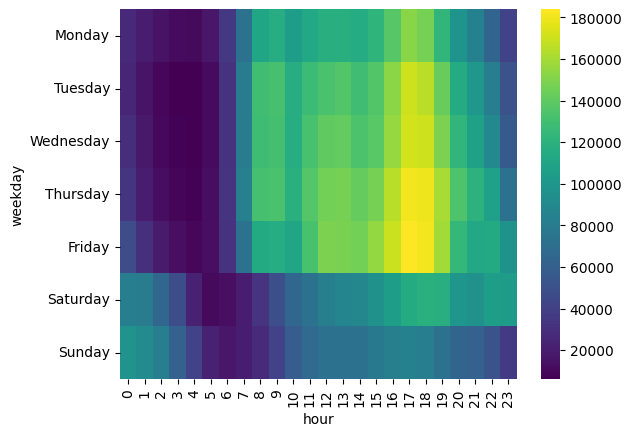

In [40]:
#NUMBER OF RIDES PER HOUR
pivot_table_trip_count = tempdf.pivot_table(index='weekday', columns='hour', values='trip_seconds', aggfunc='size')
pivot_table_trip_count = pivot_table_trip_count.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot the heatmap
sns.heatmap(pivot_table_trip_count, cmap='viridis')

<Axes: xlabel='hour', ylabel='weekday'>

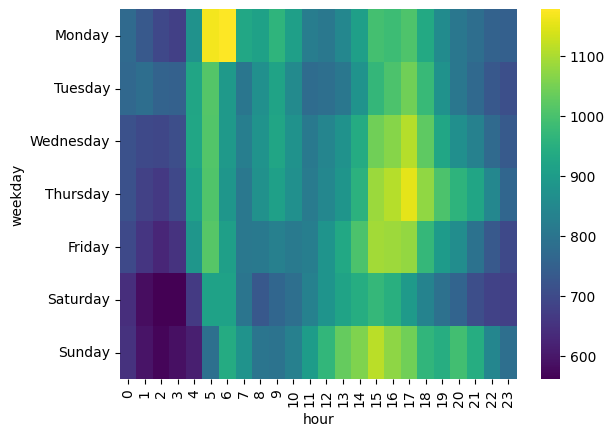

In [41]:
pivot_table_trip_seconds = tempdf.pivot_table(index='weekday', columns='hour', values='trip_seconds', aggfunc='mean')
pivot_table_trip_seconds = pivot_table_trip_seconds.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.heatmap(pivot_table_trip_seconds, cmap='viridis') #trip seconds

<Axes: xlabel='hour', ylabel='weekday'>

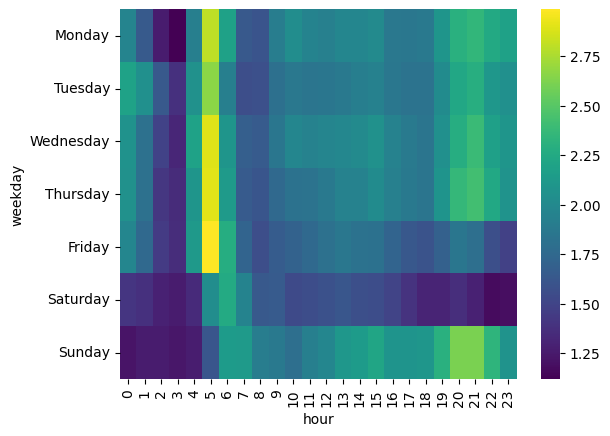

In [42]:
pivot_table_count = tempdf.pivot_table(index='weekday', columns='hour',values="tips",aggfunc='mean')
pivot_table_count = pivot_table_count.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.heatmap(pivot_table_count, cmap='viridis') #trip count

# Idle Time

In [43]:
df_sorted = df.sort_values(by=['taxi_id', 'trip_start_timestamp'])
df_sorted['idle_time'] = df_sorted.groupby('taxi_id')['trip_start_timestamp'].shift(-1) - df_sorted['trip_end_timestamp']
idledf = df_sorted.groupby('taxi_id')['idle_time'].mean().reset_index()
idledf

,taxi_id,idle_time
0,001330b81e23412049f9c3eff5b6e972a91afe59c9aa36...,0 days 01:43:19.010568922
1,0013da5489fe976daf4f4a7d246073ecf2caed9b12b3be...,0 days 02:11:58.058628318
2,0044e6c0d091476299b99345501f756b23632a96cbaf40...,0 days 03:12:16.789431545
3,00752524a4118a162dce62ff49c0eb0f79530d9e0ecb5a...,0 days 03:35:22.656597067
4,0083fcde0fb490b4ec424c63d1d750378f6ad11154d1d4...,0 days 14:48:08.372093023
...,...,...
5706,ffd70d111c7da2e5eff27ad900c8eb94d74fe286bb7aa5...,0 days 02:49:41.571428571
5707,ffda53354c610fd3af1aee46d723028a49014e35f7280c...,0 days 01:48:54.701834862
5708,ffe8d8153b8f68cd20871ae5710f9b799bcc517b40ece7...,0 days 02:19:10.400000
5709,fff3279af11dfade5e308184a5cc6c1ca2d33764634d96...,0 days 03:12:44.963205233


I discontinued this analysis, because i figured that taxi_id represents a unique vehicle rather than a unique taxi driver. Thus, there could be multiple drivers operating one taxi over the course of the year.

# Correlation grouped by hour

In [169]:
corrdf = df.copy()

In [170]:
corrdf['date_hour'] = corrdf['trip_middle_timestamp'].dt.floor('h')
hourly_rides = corrdf.groupby('date_hour').size().reset_index(name='num_rides')
hourly_precipitation = corrdf.groupby('date_hour')['precipitation'].mean().reset_index()
hourly_temperature = corrdf.groupby('date_hour')['temperature'].mean().reset_index()
hourly_price_per_mile = corrdf.groupby('date_hour')['price_per_mile'].mean().reset_index()
hourly_trip_total = corrdf.groupby('date_hour')['trip_total'].mean().reset_index()
# Merge the DataFrames
hourly_data = pd.merge(hourly_rides, hourly_precipitation, on='date_hour')
hourly_data = pd.merge(hourly_data, hourly_temperature, on='date_hour')
hourly_data = pd.merge(hourly_data, hourly_price_per_mile, on='date_hour')
hourly_data = pd.merge(hourly_data, hourly_trip_total, on='date_hour')
hourly_data['hour'] = hourly_data['date_hour'].dt.hour
hourly_data["weekend"] = pd.DatetimeIndex(hourly_data['date_hour']).dayofweek >= 5

Text(0.5, 1.0, 'Number of Taxi Rides with Precipitation > 0 vs. Precipitation = 0')

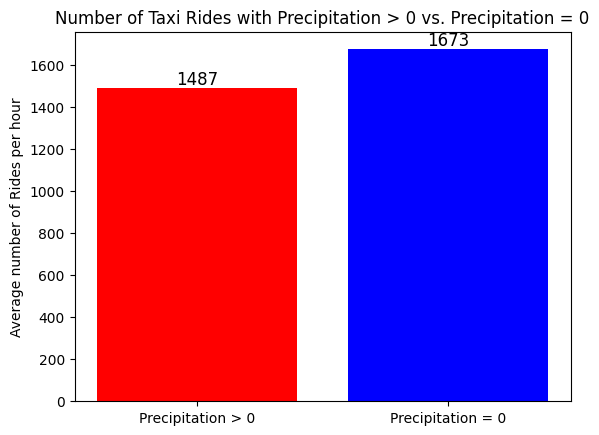

In [171]:
rides_precip_nonzero = hourly_data[hourly_data["precipitation"] > 0]["num_rides"].mean()
rides_precip_zero = hourly_data[hourly_data["precipitation"] == 0]["num_rides"].mean()

plot_data = pd.DataFrame({
    'Condition': ['Precipitation > 0', 'Precipitation = 0'],
    'Number of Rides': [rides_precip_nonzero, rides_precip_zero]
})

bar_plot = plt.bar(plot_data['Condition'], plot_data['Number of Rides'], color=['red', 'blue'])

for bar in bar_plot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=12)

plt.ylabel('Average number of Rides per hour')
plt.title('Number of Taxi Rides with Precipitation > 0 vs. Precipitation = 0')

It should be noted that it rains a lot more at night where less rides occur. This plot shows that:

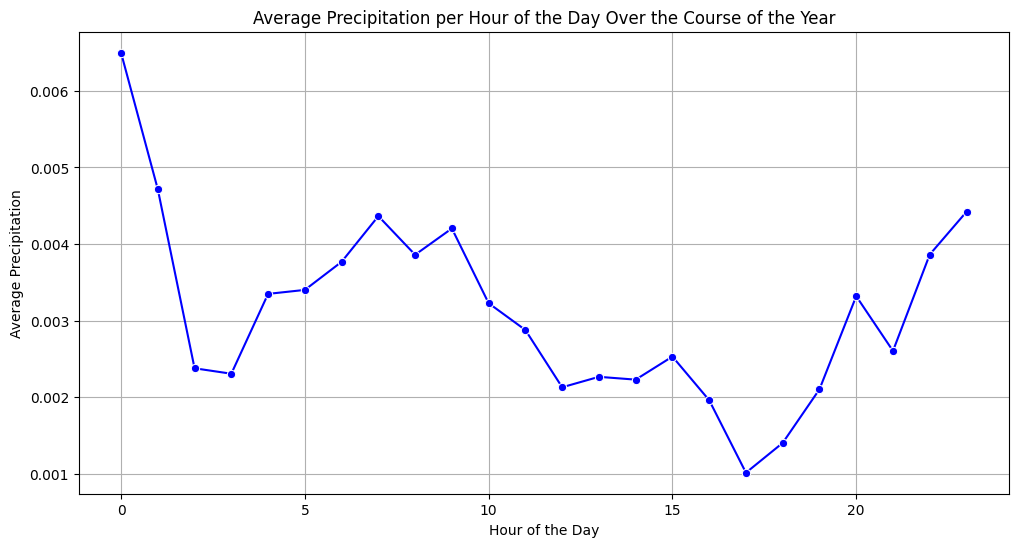

In [172]:
hourly_precipitation = hourly_data.groupby('hour')['precipitation'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='precipitation', data=hourly_precipitation, marker='o', color='blue')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Precipitation')
plt.title('Average Precipitation per Hour of the Day Over the Course of the Year')
plt.grid(True)

Thus, I created a plot that also incorporates the usual average per hour as a baseline:

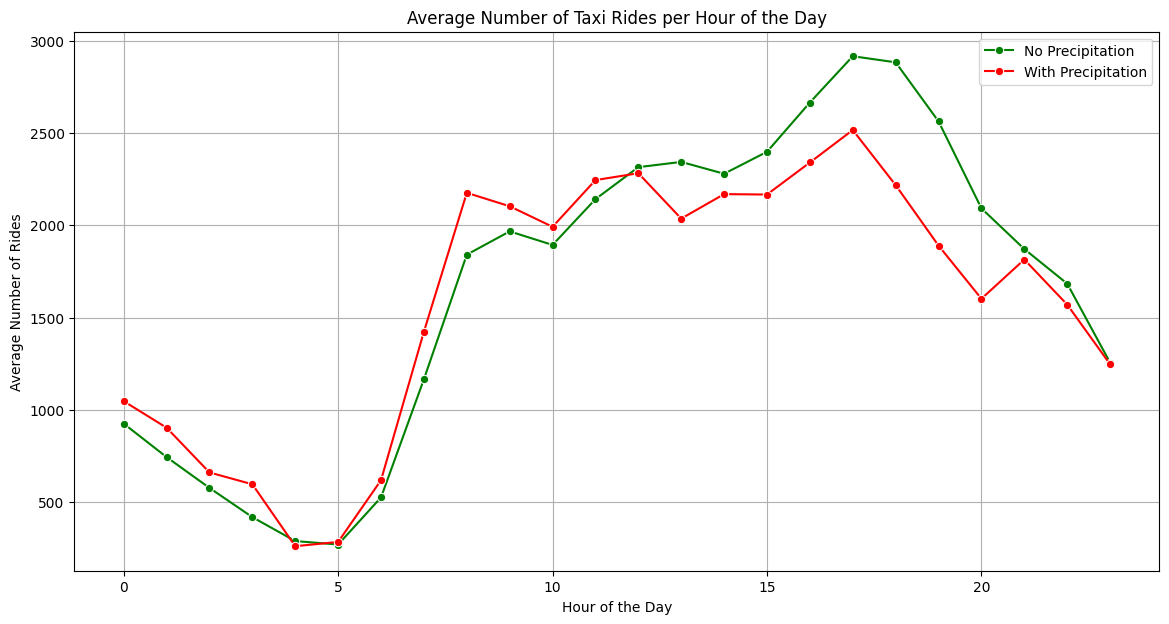

In [173]:
hourly_num_rides_no_rain = hourly_data[hourly_data["precipitation"]==0].groupby('hour')['num_rides'].mean().reset_index()
hourly_num_rides_rain = hourly_data[hourly_data["precipitation"]>0].groupby('hour')['num_rides'].mean().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(x='hour', y='num_rides', data=hourly_num_rides_no_rain, label='No Precipitation', marker='o', color='green')
sns.lineplot(x='hour', y='num_rides', data=hourly_num_rides_rain, label='With Precipitation', marker='o', color='red')

plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Rides')
plt.title('Average Number of Taxi Rides per Hour of the Day')
plt.legend()
plt.grid(True)

It seems like rain could have a positive effects on rides at night, but a negative effect during the day. Effects could be marginal.

In [174]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# Extract temperature and number of rides
X = hourly_data['temperature'].values.reshape(-1, 1)
y = hourly_data['num_rides'].values

# Create polynomial features
poly = PolynomialFeatures(degree=3)  
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict values
y_poly_pred = model.predict(X_poly)

# Add predictions to the DataFrame for plotting
hourly_data['num_rides_poly_pred'] = y_poly_pred

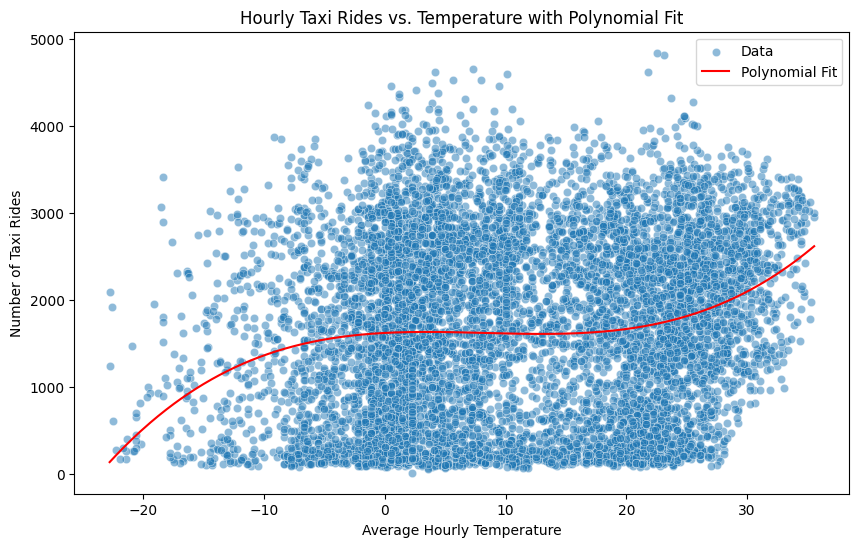

In [175]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='num_rides', data=hourly_data, alpha=0.5, label='Data')

# Sort the data for plotting the line
sorted_data = hourly_data.sort_values('temperature')
plt.plot(sorted_data['temperature'], sorted_data['num_rides_poly_pred'], color='red', label='Polynomial Fit')

plt.title('Hourly Taxi Rides vs. Temperature with Polynomial Fit')
plt.xlabel('Average Hourly Temperature')
plt.ylabel('Number of Taxi Rides')
plt.legend()
plt.show()

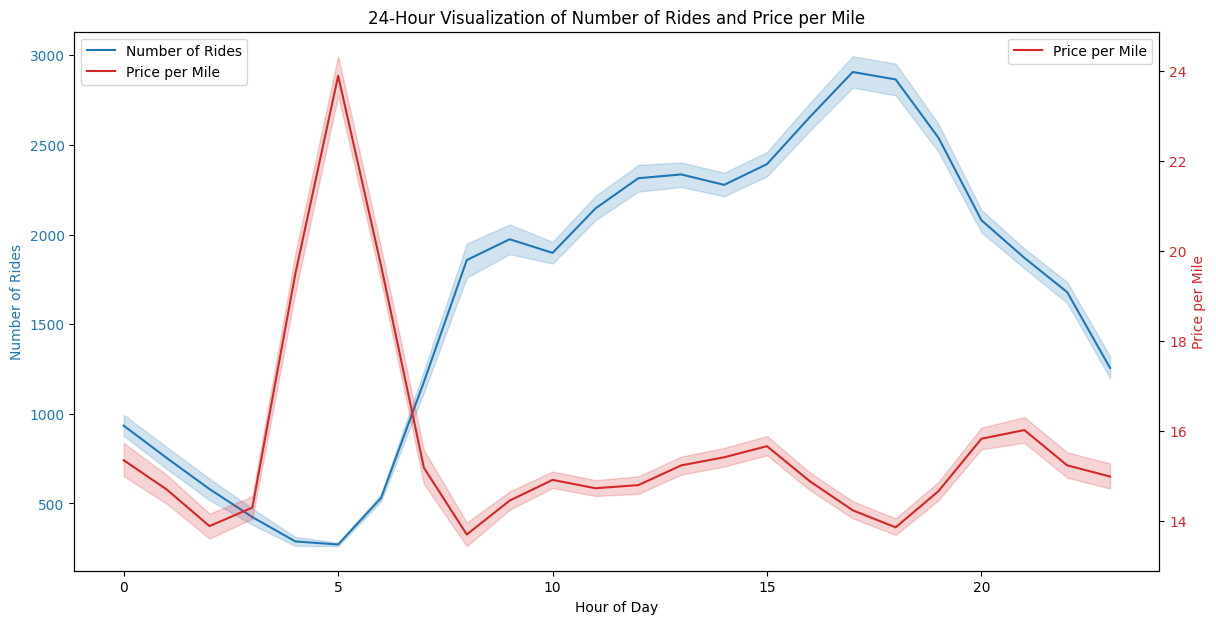

In [176]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot number of rides
color = 'tab:blue'
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Number of Rides', color=color)
line1 = sns.lineplot(x='hour', y='num_rides', data=hourly_data, ax=ax1, color=color, label='Number of Rides')
ax1.tick_params(axis='y', labelcolor=color)

# Plot price per mile
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Price per Mile', color=color)
line2 = sns.lineplot(x='hour', y='price_per_mile', data=hourly_data, ax=ax2, color=color, label='Price per Mile')
ax2.tick_params(axis='y', labelcolor=color)

# Add title and show plot
plt.title('24-Hour Visualization of Number of Rides and Price per Mile')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()


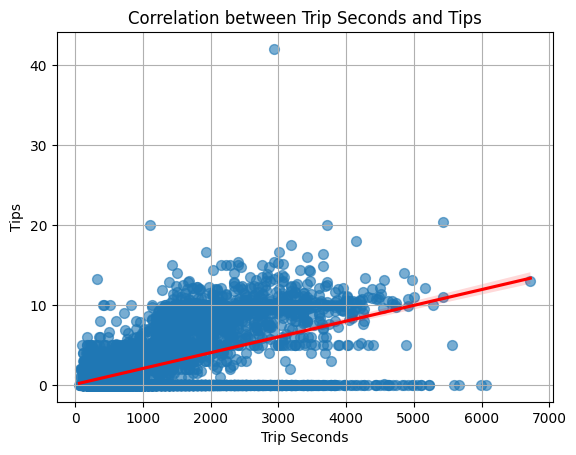

In [177]:
sns.regplot(x='trip_seconds', y='tips', data=df.sample(10000), scatter_kws={'s':50, 'alpha':0.6}, line_kws={'color':'red'})
plt.title('Correlation between Trip Seconds and Tips')
plt.xlabel('Trip Seconds')
plt.ylabel('Tips')
plt.grid(True)

# Temporal Analysis

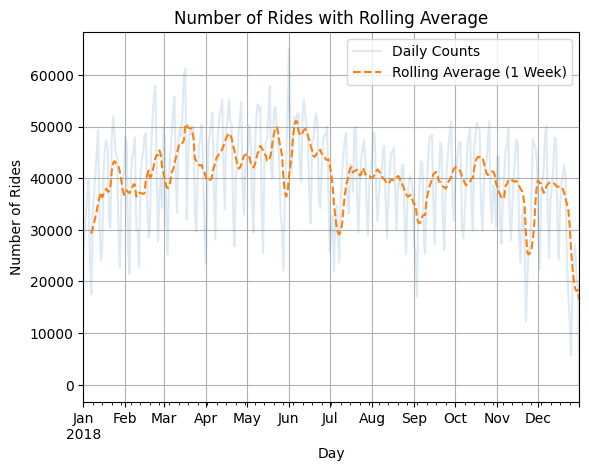

In [64]:
temp = df['trip_middle_timestamp'].dt.to_period('D')
daily_counts = temp.value_counts().sort_index()
daily_counts_rolling = daily_counts.rolling(window=7).mean()

daily_counts.plot(label='Daily Counts', alpha=0.15)
daily_counts_rolling.plot(label='Rolling Average (1 Week)', linestyle='--')
plt.title('Number of Rides with Rolling Average')
plt.xlabel('Day')
plt.ylabel('Number of Rides')
plt.legend()
plt.grid(True)

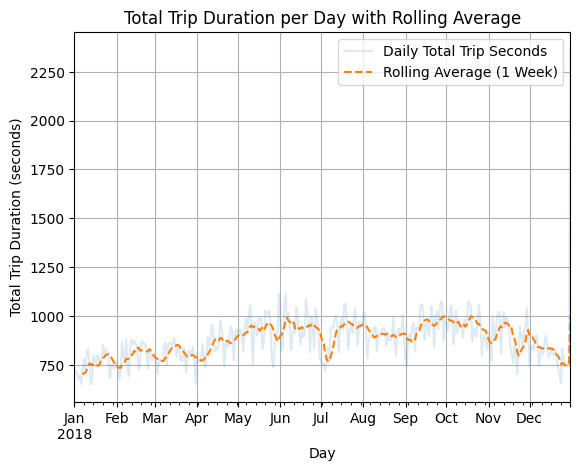

In [66]:
daily_trip_seconds = df.groupby(df['trip_middle_timestamp'].dt.to_period('D'))['trip_seconds'].mean().sort_index()
daily_trip_seconds_rolling = daily_trip_seconds.rolling(window=7).mean()

daily_trip_seconds.plot(label='Daily Average Trip Seconds', alpha=0.15)
daily_trip_seconds_rolling.plot(label='Rolling Average (1 Week)', linestyle='--')
plt.title('Average Trip Duration per Day with Rolling Average')
plt.xlabel('Day')
plt.ylabel('Total Trip Duration (seconds)')
plt.legend()
plt.grid(True)

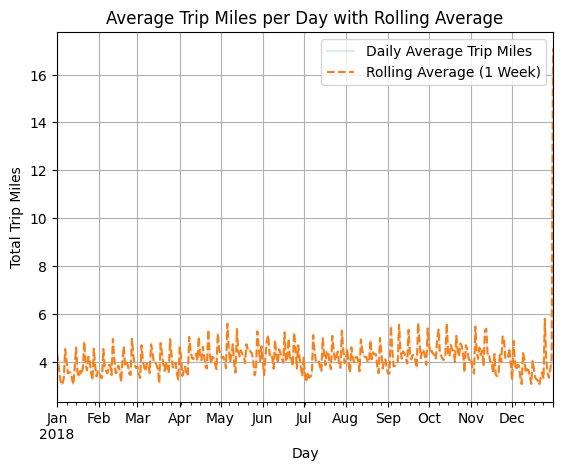

In [69]:
daily_trip_miles = df.groupby(df['trip_middle_timestamp'].dt.to_period('D'))['trip_miles'].mean().sort_index()
daily_trip_miles_rolling = daily_trip_miles.rolling(window=7).mean()

daily_trip_miles.plot(label='Daily Average Trip Miles', alpha=0.15)
daily_trip_miles.plot(label='Rolling Average (1 Week)', linestyle='--')
plt.title('Average Trip Miles per Day with Rolling Average')
plt.xlabel('Day')
plt.ylabel('Total Trip Miles')
plt.legend()
plt.grid(True)

# Payment Type

In [96]:
payment_counts = df['payment_type'].value_counts().reset_index()
payment_counts.columns = ['payment_type', 'count']

In [98]:
payment_counts

,payment_type,count
0,Credit Card,7339690
1,Cash,7017183
2,Mobile,105563
3,Prcard,43971
4,Unknown,25556
5,No Charge,22187
6,Dispute,3361
7,Pcard,2649
8,Split,1271
9,Prepaid,597


C:\Users\marlxn\AppData\Local\Temp\ipykernel_10836\366437917.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='payment_type', y='count', data=payment_counts, palette='viridis')


Text(0.5, 1.0, 'Number of Rides per Payment Type')

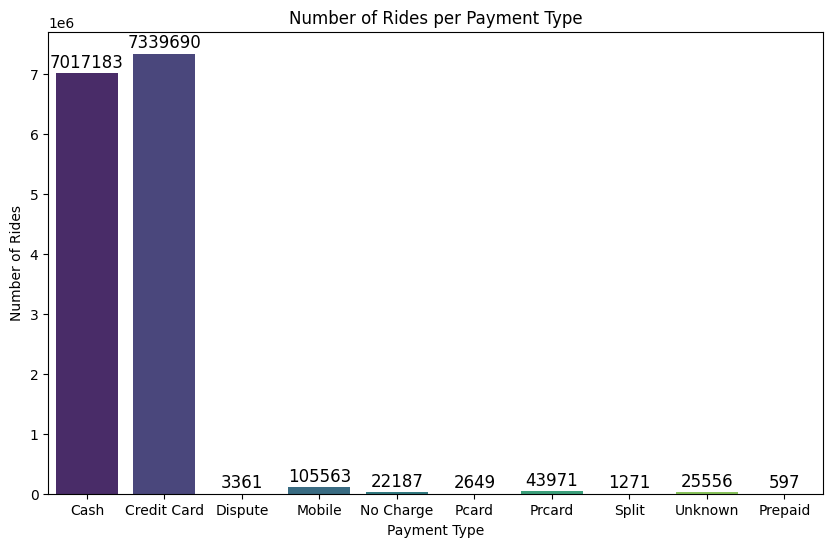

In [117]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='payment_type', y='count', data=payment_counts, palette='viridis')

# Add annotations without decimal places
for bar in barplot.patches:
    height = bar.get_height()
    barplot.annotate(f'{int(height)}', 
                     (bar.get_x() + bar.get_width() / 2, 
                      height), ha='center', va='center',
                     size=12, xytext=(0, 8),
                     textcoords='offset points')

plt.xlabel('Payment Type')
plt.ylabel('Number of Rides')
plt.title('Number of Rides per Payment Type')

C:\Users\marlxn\AppData\Local\Temp\ipykernel_10836\1553735075.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_payment_counts = df.groupby(['hour', 'payment_type']).size().reset_index(name='count')


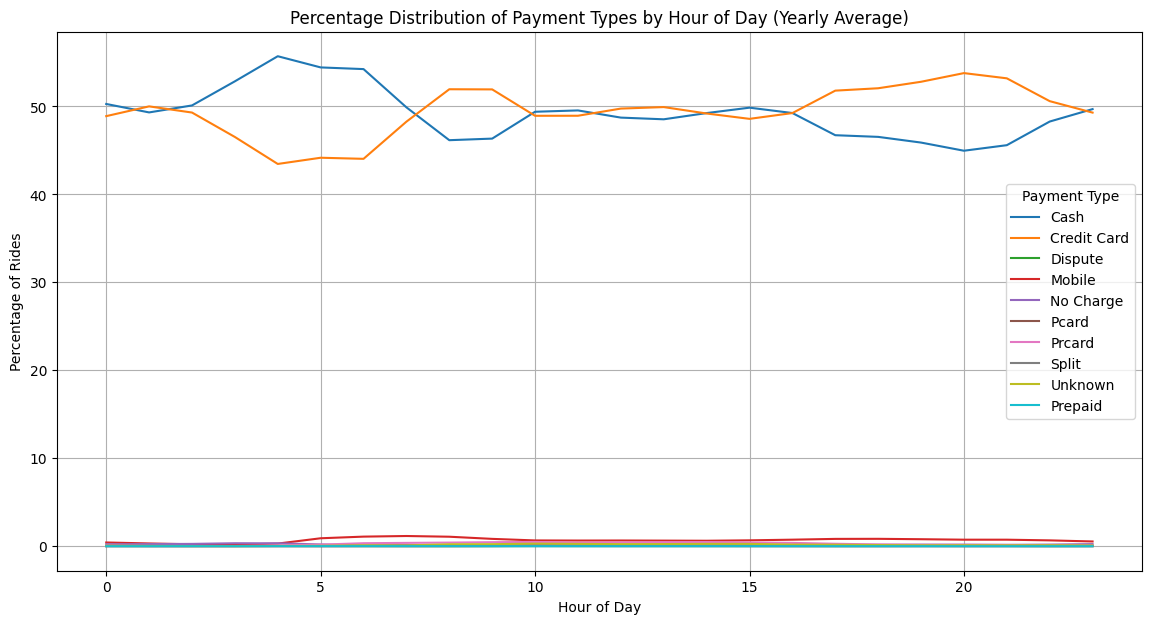

In [127]:
df['hour'] = df['trip_middle_timestamp'].dt.hour
hourly_payment_counts = df.groupby(['hour', 'payment_type']).size().reset_index(name='count')
total_counts_per_hour = hourly_payment_counts.groupby('hour')['count'].sum().reset_index(name='total_count')
hourly_payment_counts = pd.merge(hourly_payment_counts, total_counts_per_hour, on='hour')
hourly_payment_counts['percentage'] = (hourly_payment_counts['count'] / hourly_payment_counts['total_count']) * 100
pivot_data = hourly_payment_counts.pivot(index='hour', columns='payment_type', values='percentage').fillna(0)
pivot_data = pivot_data.reset_index()

plt.figure(figsize=(14, 7))

for payment_type in pivot_data.columns[1:]:
    plt.plot(pivot_data['hour'], pivot_data[payment_type], label=payment_type)

plt.xlabel('Hour of Day')
plt.ylabel('Percentage of Rides')
plt.title('Percentage Distribution of Payment Types by Hour of Day (Yearly Average)')
plt.legend(title='Payment Type')
plt.grid(True)